## Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [83]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv", error_bad_lines=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
df.shape

(891, 12)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### As we can see we have null values in Age and Cabin columns. Now we will fill null values with the help of Mean. 


In [88]:
## Filling null values. 
df['Age'].fillna(int(df['Age'].mean()), inplace=True)
print(df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [89]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Now we can see there is no null values in  Age columns. 

## EDA
Lets try to analyze the target

In [90]:
## Lets try to analyze the target
df['Survived'].unique()

array([0, 1], dtype=int64)

In [91]:
df.Survived.value_counts().sort_index()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

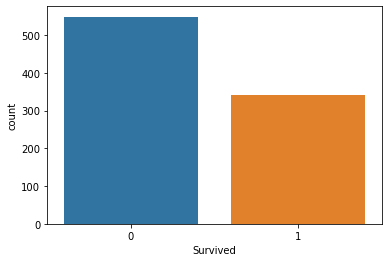

In [92]:
sns.countplot(x='Survived', data=df)

#### above graph shows the Survival range in the form of 0(Dead) and 1(Alive).

In [93]:
df = df.drop("Cabin",axis = 1) ## as we can see we dont need cadin for the prediction. 
df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [94]:
df = df.drop("Name",axis = 1) ## as we can see we dont need name for the prediction. 
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,29.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [95]:
df = df.drop("Sex",axis = 1) ## as we can see we dont need Sex for the prediction. 
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,35.0,1,0,113803,53.1000,S
4,5,0,3,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,211536,13.0000,S
887,888,1,1,19.0,0,0,112053,30.0000,S
888,889,0,3,29.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,26.0,0,0,111369,30.0000,C


In [96]:
df = df.drop("Ticket",axis = 1) ## as we can see we dont need Ticket for the prediction. 
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,22.0,1,0,7.2500,S
1,2,1,1,38.0,1,0,71.2833,C
2,3,1,3,26.0,0,0,7.9250,S
3,4,1,1,35.0,1,0,53.1000,S
4,5,0,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,S
887,888,1,1,19.0,0,0,30.0000,S
888,889,0,3,29.0,1,2,23.4500,S
889,890,1,1,26.0,0,0,30.0000,C


In [97]:
df = df.drop("Embarked", axis = 1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,29.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [98]:
# Add two columns to make a new column
df['Family'] = df['SibSp'] + df['Parch'] ## As we can see Sibsp and parch we can make it 1 column name with Family. 
print('Updated DataFrame:')
print(df)

Updated DataFrame:
     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Family
0              1         0       3  22.0      1      0   7.2500       1
1              2         1       1  38.0      1      0  71.2833       1
2              3         1       3  26.0      0      0   7.9250       0
3              4         1       1  35.0      1      0  53.1000       1
4              5         0       3  35.0      0      0   8.0500       0
..           ...       ...     ...   ...    ...    ...      ...     ...
886          887         0       2  27.0      0      0  13.0000       0
887          888         1       1  19.0      0      0  30.0000       0
888          889         0       3  29.0      1      2  23.4500       3
889          890         1       1  26.0      0      0  30.0000       0
890          891         0       3  32.0      0      0   7.7500       0

[891 rows x 8 columns]


In [99]:
df = df.drop("Parch", axis = 1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Fare,Family
0,1,0,3,22.0,1,7.2500,1
1,2,1,1,38.0,1,71.2833,1
2,3,1,3,26.0,0,7.9250,0
3,4,1,1,35.0,1,53.1000,1
4,5,0,3,35.0,0,8.0500,0
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,13.0000,0
887,888,1,1,19.0,0,30.0000,0
888,889,0,3,29.0,1,23.4500,3
889,890,1,1,26.0,0,30.0000,0


In [100]:
df = df.drop("SibSp", axis = 1)
df

,PassengerId,Survived,Pclass,Age,Fare,Family
0,1,0,3,22.0,7.2500,1
1,2,1,1,38.0,71.2833,1
2,3,1,3,26.0,7.9250,0
3,4,1,1,35.0,53.1000,1
4,5,0,3,35.0,8.0500,0
...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,0
887,888,1,1,19.0,30.0000,0
888,889,0,3,29.0,23.4500,3
889,890,1,1,26.0,30.0000,0


In [101]:
df.shape

(891, 6)

## Statistical Summary:

In [102]:
df.describe() 

,PassengerId,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.560236,32.204208,0.904602
std,257.353842,0.486592,0.836071,13.005010,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,29.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,10.000000


<AxesSubplot:>

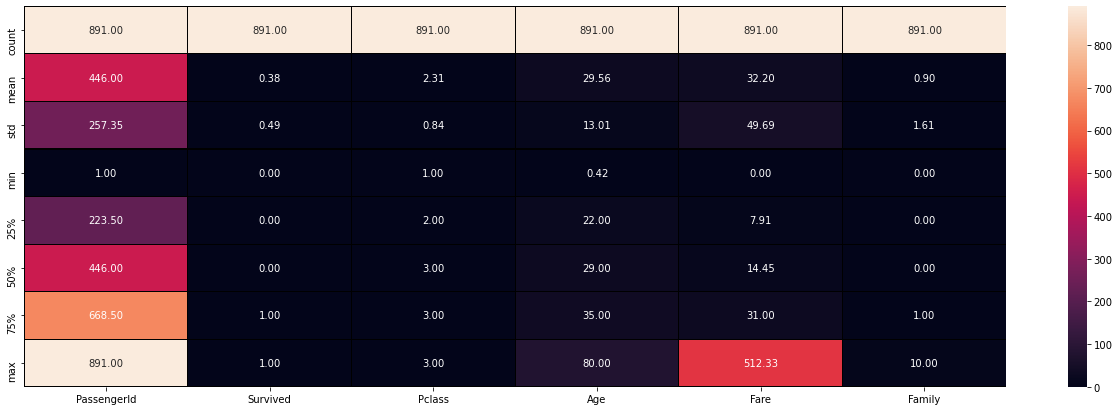

In [103]:
#Heatmap using df.describe

import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(), annot=True, linewidths=0.1, linecolor='black',fmt=".2f")

## Checking for nulls

In [104]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
Fare           0
Family         0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

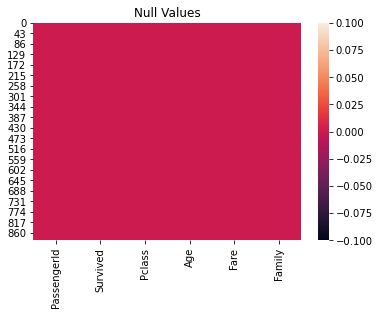

In [105]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show

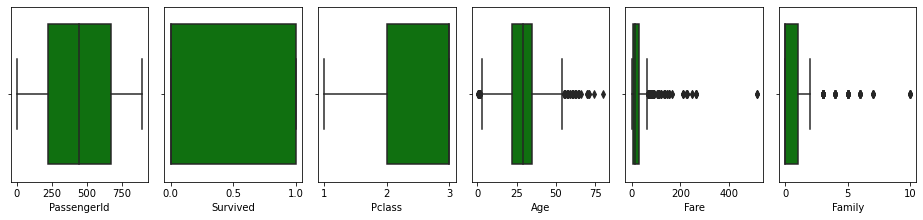

In [107]:
## Outlier checking: using box plot will check min value, max value and outliers. 

collist = df.columns.values
ncol = 30
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0, len(collist)):
    plt.subplot(ncol, nrows,i+1)
    sns.boxplot(df[collist[i]], color = "green", orient = 'v')
    plt.tight_layout()

#### Lets check the skewness

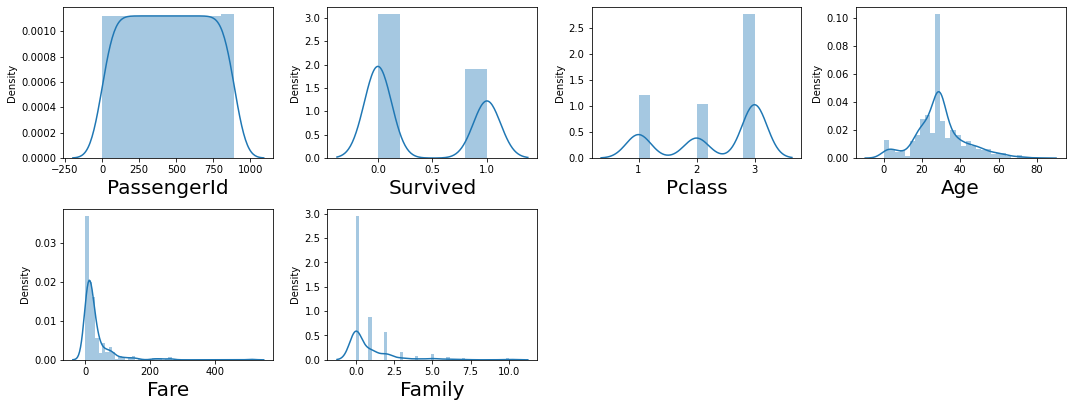

In [108]:
#Data distribution:
#Dist Plot:

plt.figure(figsize = (15,8), facecolor = 'white')
plotnumber = 1   #initializing 1 to a name

for column in df:
    if plotnumber <= 11:
        ax = plt.subplot(3,4,plotnumber) #In 3 rows I want 4 columns to be plotted 
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        plotnumber += 1
        plt.tight_layout()

#### Most of the data is skewed

## checking for class imbalance

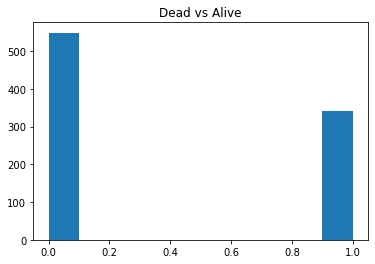

In [109]:
#Lets check if there is class imbalance

df["Survived"].hist(grid = False)
plt.title("Dead vs Alive")
plt.show()

### We will deal with the imbalance later after training the model.

## correlation

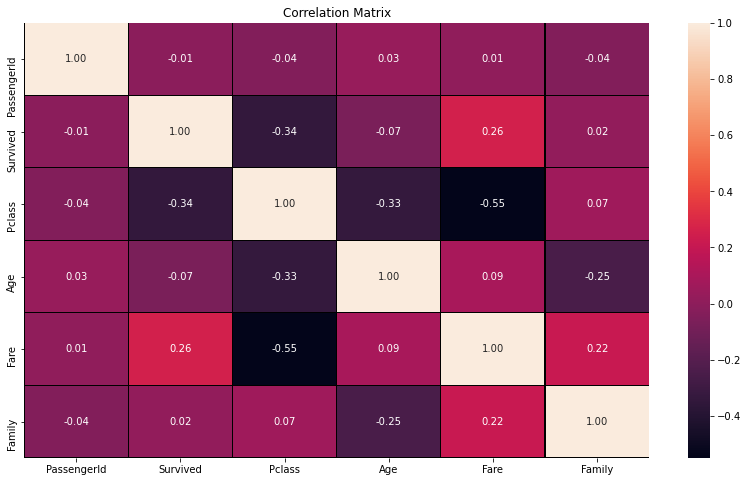

In [110]:
correlation = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, linewidths=0.1, linecolor='black', fmt="0.2f")
plt.title("Correlation Matrix")
plt.show()

## Outcome of Correlation;
Fare has 22 percent corr. with the target column which can be considered as a Good bond. Age has 25 percent corr. with the target column which can be considered as a good Bond. Pclass has 7 percent corr. with the target column which can be considered as a Weak bond. Survived has 2 percent corr. with the target column which can be considered as a very Weak bond. Passengerid has 4 percent corr. with the target column which can be considered as a Weak bond.

<AxesSubplot:>

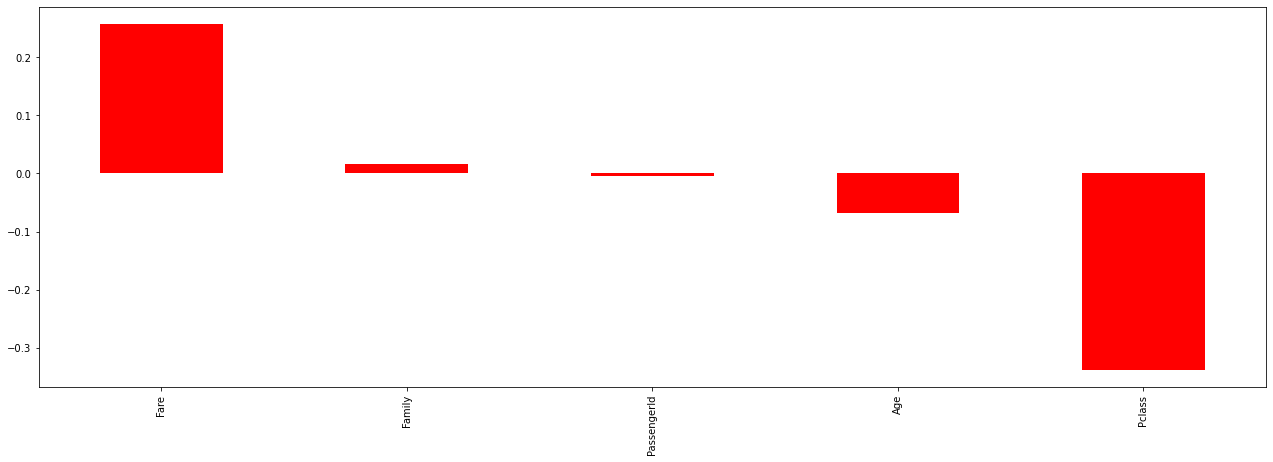

In [112]:
plt.figure(figsize=(22,7))
correlation['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='r')

In [113]:
correlation['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Family         0.016639
PassengerId   -0.005007
Age           -0.067814
Pclass        -0.338481
Name: Survived, dtype: float64

#### Observation: Min Correlation: PassengerID ; Max Correlation: Survived

## lets divide data into features and label

In [114]:
x = df.drop("Survived",axis = 1)
y = df["Survived"]
x

,PassengerId,Pclass,Age,Fare,Family
0,1,3,22.0,7.2500,1
1,2,1,38.0,71.2833,1
2,3,3,26.0,7.9250,0
3,4,1,35.0,53.1000,1
4,5,3,35.0,8.0500,0
...,...,...,...,...,...
886,887,2,27.0,13.0000,0
887,888,1,19.0,30.0000,0
888,889,3,29.0,23.4500,3
889,890,1,26.0,30.0000,0


## Skewness

In [115]:
x.skew()

PassengerId    0.000000
Pclass        -0.630548
Age            0.466268
Fare           4.787317
Family         2.727441
dtype: float64

## power_tranform function

In [116]:
# we will remove the skewness using power_tranform function
from sklearn.preprocessing import power_transform
x_new = power_transform(x ,  method = 'yeo-johnson')
x = pd.DataFrame(x_new,columns=x.columns)

In [117]:
x.skew()

PassengerId   -0.283201
Pclass        -0.441438
Age            0.069162
Fare          -0.040329
Family         0.539231
dtype: float64

#### All values are under +/-0.5, skewness is handled.¶

## Checking outliers:

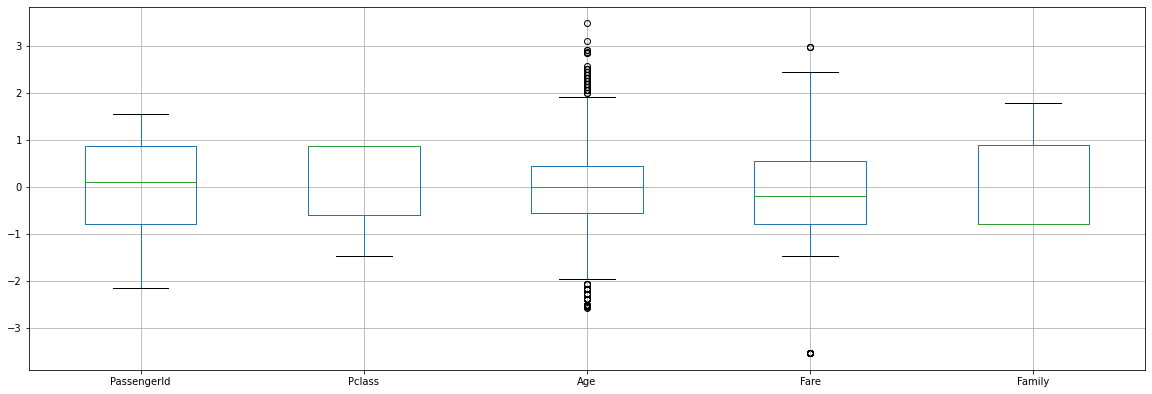

In [118]:
# plotting boxplot for all the columns
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

## Outliers Removal


## ZScore Technique:

In [119]:
from scipy.stats import zscore
import numpy as np 
z=np.abs(zscore(x))
z.shape

(891, 5)

In [120]:
threshold=3
print(np.where(z>3))

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 630, 633, 674, 732,
       806, 815, 822, 851], dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2], dtype=int64))


In [121]:
df_new=x[(z<3).all(axis=1)]
print(x.shape)
print(df_new.shape)

(891, 5)
(874, 5)


In [122]:
## Percentage data loss: 
loss_percent=(891-874)/891*100
print(loss_percent)

1.9079685746352413


#### Data loss is in the acceptable range , good to proceed.


## Finding Best Random_state:

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [125]:
lr = LogisticRegression()

In [126]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print(f"At random state {i}, The model performs very well")
        
        print(f"At random state {i}, the training accuracy is:- {accuracy_score(y_train,pred_train)*100}")
        print(f"At random state {i}, the testing accuracy is:- {accuracy_score(y_test,pred_test)*100}")
        print("\n")


At random state 224, The model performs very well
At random state 224, the training accuracy is:- 71.48876404494382
At random state 224, the testing accuracy is:- 71.50837988826815


At random state 432, The model performs very well
At random state 432, the training accuracy is:- 70.92696629213484
At random state 432, the testing accuracy is:- 70.94972067039106


At random state 529, The model performs very well
At random state 529, the training accuracy is:- 70.92696629213484
At random state 529, the testing accuracy is:- 70.94972067039106


At random state 536, The model performs very well
At random state 536, the training accuracy is:- 70.92696629213484
At random state 536, the testing accuracy is:- 70.94972067039106


At random state 663, The model performs very well
At random state 663, the training accuracy is:- 70.36516853932584
At random state 663, the testing accuracy is:- 70.39106145251397


At random state 678, The model performs very well
At random state 678, the training a

#### Best training accuracy is 71.48%, best testing accuracy is 71.50% on Random_state 224.

## Creating Train-Test-split

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 224)

In [129]:
print('Training Survived - \n', y_train.value_counts())

Training Survived - 
 0    446
1    266
Name: Survived, dtype: int64


## Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print("Accuracy",accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 71.50837988826815
[[92 11]
 [40 36]]
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       103
           1       0.77      0.47      0.59        76

    accuracy                           0.72       179
   macro avg       0.73      0.68      0.68       179
weighted avg       0.73      0.72      0.70       179



#### for Logistic Regression, from above Confusion matrix, TN = 92, FP = 11, FN = 40, TP = 36. accuracy = 72%.

## Decision Tree Classifier

In [131]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Accuracy",accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 62.56983240223464
[[74 29]
 [38 38]]
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       103
           1       0.57      0.50      0.53        76

    accuracy                           0.63       179
   macro avg       0.61      0.61      0.61       179
weighted avg       0.62      0.63      0.62       179



#### for Decision Tree Classifier, from above Confusion matrix, TN = 74, FP = 29, FN = 38, TP = 38. accuracy = 63%.

## Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = dt.predict(x_test)
print("Accuracy",accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 62.56983240223464
[[74 29]
 [38 38]]
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       103
           1       0.57      0.50      0.53        76

    accuracy                           0.63       179
   macro avg       0.61      0.61      0.61       179
weighted avg       0.62      0.63      0.62       179



#### for Random Forest Classifier, from above Confusion matrix, TN = 74, FP = 29, FN = 38, TP = 38. accuracy = 63%.

## SVM

In [133]:
from sklearn.svm import SVC

svc = SVC()
svc.fit( x_train, y_train)

ad_pred = svc.predict(x_test)
print("Acuuracy", accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Acuuracy 72.06703910614524
[[96  7]
 [43 33]]
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       103
           1       0.82      0.43      0.57        76

    accuracy                           0.72       179
   macro avg       0.76      0.68      0.68       179
weighted avg       0.75      0.72      0.70       179



#### for SVM, from above Confusion matrix, TN = 96, FP = 7, FN = 43, TP = 33. accuracy = 72%.

#### Lets check the CV scores for the above models, for overfitting.

## Cross Validation

In [139]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("Cross Validation score of LR model:", scr.mean())

Cross Validation score of LR model: 0.7015943757454021


In [140]:
scr=cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DT model:", scr.mean())

Cross Validation score of DT model: 0.6363881740003767


In [141]:
scr=cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of rf model:", scr.mean())

Cross Validation score of rf model: 0.6925051785826376


In [142]:
scr=cross_val_score(svc, x, y, cv=5)
print("Cross Validation score of SVC model:", scr.mean())

Cross Validation score of SVC model: 0.7161509007595255


#### Considering good CV score, Logistic Regression is performing better among all, we go ahead with Logistic Regression.

## Hyper Parameter Tuning

In [163]:

from sklearn.model_selection import GridSearchCV

## Creating parameter list to pass in GridsearchCV
parameters = { "multi_class":['auto', 'ovr', 'multinomial'], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
              "penalty" :['l1', 'l2', 'elasticnet', 'none']}


In [164]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) # Fitting the data in model
GCV.best_params_  # Printing the best parameter found by GridSearchCV

{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}

In [165]:
GCV_pred=GCV.best_estimator_.predict(x_test) # Prediciting with the best parameters
accuracy_score(y_test,GCV_pred) # Checking final accuracy

0.7150837988826816

#### Accuracy of LogisticRegression after Hyper parameter tuning is 72%


## ROC AUC Plot

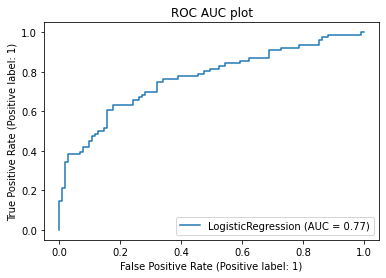

In [166]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

#### Final Accuracy is 72% & AUC score is 77%. which is good.
## Saving the model in Pickle format

In [167]:
import pickle
filename = 'Titanic_project.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [168]:
import numpy as np
a= np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted }, index=range(len(a)))
df_com.head()

,Original,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1


#### We can visualize there is no error in the Titanic prediction using the above model.
#### Our Model is Good and we can proceed. 